## 병원 개폐업 예측

1. 분석 목적,결론 도출방식 정의 <br>


2. 데이터 탐색(EDA) <br>
    : 컬럼 명세 <br>
    : 결측치 파악 및 대체,제거 <br>
    : 이상치 파악 <br>
    : 시각화 통한 EDA <br>
    
    <br>
    
3. Feature Engineering <br>
    : Feature Vector 생성 <br>
 
    <br>
 
4. Modeling <br>
    : k-ford , cross validation 통한 최적 모델 채택

### 1. 분석 목적, 결론 도출방식 정의 <br>

> 상환 기간 동안의 계속 경영 여부를 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 병원들에게 금융 기회를 제공

> 또한, 병원의 "폐업"을 예측함으로써 은행의 원금손실을 줄임
 
> "accuracy"로 정확도 측정

### 2. EDA

#### 2.1 컬럼명세

> 컬럼의 경우 총 58개의 열로, 크게 병원에 대한 기본정보와 재무(회계)정보로 나누어짐

> ```기본정보```

inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

종합병원 : 입원환자 100명 이상 수용 가능

병원 : 입원 환자 30명 이상 100명 미만 수용 가능

의원 : 입원 환자 30명 이하 수용 가능

한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

> ```재무(회계)``` 정보 ( * 1의 경우 17년도, 2의 경우 16년도 데이터를 의미)

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동 여부  

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


#### 2.2 결측치 파악

In [4]:
# 컬럼별 결측치

train.isnull().sum()
# test.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [5]:
# 결측치 가진 row(병원) 살펴보기
null_check = train.loc[(train.isnull().sum(1) >= 1) , : ]
null_check

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
14,26,open,ulsan,127,20160531,237.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,901.0,same
32,55,open,incheon,141,19930708,232.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,323.0,same
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51.0,NaN,change
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.000000e+00,NaN,NaN,NaN
55,87,open,gyeonggi,120,20130314,327.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,203.0,same
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.0,NaN,NaN
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.000000e+00,NaN,NaN,NaN


#### 2.3 결측치 대체


> 병원업종에 따른 평균치로 결측치 대체

> 재무데이터의 경우 병원업종,폐업여부에 따른 평균치로 결측치 대체

> 오너교체 여부의 경우 우선 결측치 그대로 둠

* 업종별 침대 수 파악 결과 한의원과 치과에서는 침대수가 0이다. (* 한의원과 치과는 병상으로 취급하지 않는다?)

* test 데이터의 경우 치과업종 데이터가 하나도 포함되어 있지 않다

* 업종이 결측이인 값 한개 삭제

In [6]:
# bedCount 결측치 대체
tmp_list = [train,test]

for dataset in tmp_list:
    dataset['bedCount'].fillna(dataset.groupby('instkind')['bedCount'].transform('median'),inplace=True)

In [7]:
# instkind 결측값 삭제

# train[train['instkind'].isnull() == True]
train = train.drop(193,0)

In [55]:
# 재무(회계) 데이터 결측치 대체

accountList = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2']

accountList_17 = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1','employee1']

accountList_16 =  ['revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2','employee2']



for i in range(len(accountList)):
    train[accountList[i]].fillna(train.groupby(['OC','instkind'])[accountList[i]].transform('median'),inplace=True)
    
    

* test 데이터의 경우도 폐업여부,병원업종별에 따른 각 재무데이터의 평균으로 결측치 대체하려고 하였으나, test데이터는 폐업여부가 없기때문에 불가능

#### 2.4 분산분석 통한 특성 선택

> 기존 데이터의 경우 총 58개의 특성을 가짐. 특성수가 너무 많은 경우 모델 생성시 오버핏 발생확률이 높기 때문에 특성 축소 필요

> 분산분석(ANOVA)을 통한 특성 선택

In [56]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
standard_scaler = StandardScaler()
standard_scaler.fit(train[accountList_16])

train_scaled = standard_scaler.transform(train[accountList_16])

select = SelectPercentile(score_func=f_classif, percentile=50 ) #F 검정 
select.fit(train_scaled, train['OC'])

train_scaled_selected = select.transform(train_scaled)

print("원본 train.shape:", train_scaled.shape)
print("X_scaled_selected.shape:", train_scaled_selected.shape)

원본 train.shape: (300, 25)
X_scaled_selected.shape: (300, 12)


In [57]:
# 선택된 특성 확인하기

mask = select.get_support()


# selected_col_all = []
# selected_col_17 = []
selected_col_16 = []


for idx,obj in enumerate(mask):
    if obj == True:
        selected_col_16.append(accountList_16[idx])

In [58]:
# print(selected_col_all)
# print(selected_col_17)
print(selected_col_16)

['revenue2', 'sga2', 'salary2', 'profit2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'shortLoan2', 'NCLiabilities2']


#### 2.5 주성분 분석을 통한 차원축소

(300, 25)
(300, 2)


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


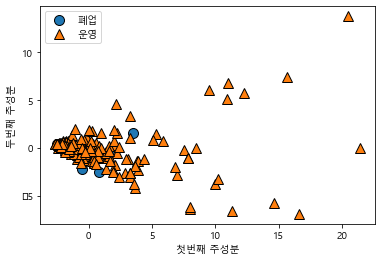

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


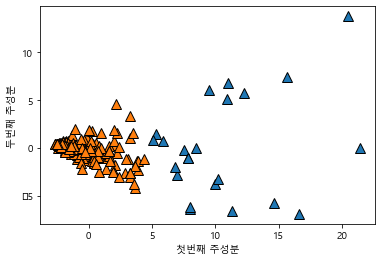

In [59]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)        # 두 개의 주성분만 유지 .
pca.fit(train_scaled)                # PCA 모델 

X_pca = pca.transform(train_scaled)  # 두 개의 주성분만 유지하는 데이터 변환 (차원축소)  
print( train_scaled.shape ) #(569, 30)  569행 30열 
print( X_pca.shape )    #(569, 2)  차원 축소 후   569행 2열

#####################################
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['OC'])
plt.legend(["폐업","운영"],loc="best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

#####################################

### 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_scaled)
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],kmeans.labels_,markers='^')
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()


## 3. Feature Engineering 